In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling

sns.set(context='notebook', style='ticks')

In [2]:
analysis_subset = (pd.read_csv('../data/clean/analysis_subset.csv', low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
analysis_subset.shape

(33128, 54)

In [4]:
age_mask = (analysis_subset.age_test>=48) & (analysis_subset.age_test<60)

In [5]:
analysis_subset[age_mask].drop_duplicates(subset='student_idx').shape

(1424, 54)

In [6]:
data_4yo = analysis_subset[age_mask].drop_duplicates(subset='student_idx').copy()

## Demographics

In [7]:
data_4yo.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      761
Female    663
Name: male, dtype: int64

In [8]:
data_4yo.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       918
Black       150
Hispanic    144
Other       137
Asian        75
Name: race, dtype: int64

In [9]:
data_4yo.premature.replace({True: '>=36 weeks', False: '<36 weeks', np.nan: 'Unknown'}).value_counts()

<36 weeks     1060
Unknown        228
>=36 weeks     136
Name: premature, dtype: int64

In [10]:
data_4yo.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', np.nan:'Missing'}).value_counts().sort_index()

1          337
2          590
3          272
4+         160
Missing     65
Name: sib, dtype: int64

In [13]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

data_4yo.family_inv.replace(family_lookup).value_counts()

Ideal Participation      455
Good Participation       381
Average Participation    320
Missing                  151
Below Average             95
Limited Participation     22
Name: family_inv, dtype: int64

## Hearing loss

In [21]:
data_4yo.deg_hl_below6.isnull().sum()

187

In [22]:
hl_data = data_4yo.set_index('student_idx')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [23]:
data_4yo.one_or_both_parent_hl.value_counts()

0.0    1164
1.0      88
Name: one_or_both_parent_hl, dtype: int64

In [24]:
data_4yo.one_or_both_parent_hl.isnull().sum()

172

Individuals with no hearing loss type

In [26]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      1089
bilateral_cond        43
bilateral_ansd        38
assymetrical          34
bilateral_mixed       27
unilateral_unk         0
unilateral_cond        0
unilateral_mixed       0
unilateral_ansd        0
unilateral_snhl        0
bilateral_unk          0
bilateral_normal       0
dtype: int64

In [27]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.76
bilateral_cond      0.03
bilateral_ansd      0.03
assymetrical        0.02
bilateral_mixed     0.02
unilateral_unk      0.00
unilateral_cond     0.00
unilateral_mixed    0.00
unilateral_ansd     0.00
unilateral_snhl     0.00
bilateral_unk       0.00
bilateral_normal    0.00
dtype: float64

In [29]:
tech_data = data_4yo.set_index('student_idx')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [30]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        1054
bilateral_ha         268
bimodal               75
unilateral_ci         13
unilateral_ha          5
unilateral_other       1
bilateral_other        1
dtype: int64

In [31]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.74
bilateral_ha        0.19
bimodal             0.05
unilateral_ci       0.01
unilateral_other    0.00
unilateral_ha       0.00
bilateral_other     0.00
dtype: float64

Individuals with no technology type

In [32]:
tech_data[tech_data.sum(1)==0].index.values

array([3517, 3178, 2701, 6132,  296,  139, 3953])

## Hearing Loss

In [33]:
data_4yo.columns[data_4yo.columns.str.contains('_hl_')]

Index(['bilateral_hl_normal', 'unilateral_hl_severe', 'unilateral_hl_mild',
       'unilateral_hl_slight', 'bilateral_hl_severe', 'bilateral_hl_slight',
       'unilateral_hl_moderate', 'bilateral_hl_mild', 'bilateral_hl_moderate',
       'unilateral_hl_modsev', 'bilateral_hl_profound', 'deg_hl_below6',
       'unilateral_hl_profound', 'bilateral_hl_modsev'],
      dtype='object')

In [36]:
hl_data = data_4yo.set_index('student_idx')[['bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound']]

In [37]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_hl_profound     487
bilateral_hl_moderate     144
bilateral_hl_modsev       119
bilateral_hl_severe        88
bilateral_hl_mild          53
bilateral_hl_slight        10
unilateral_hl_slight        2
unilateral_hl_modsev        1
unilateral_hl_mild          1
unilateral_hl_profound      0
unilateral_hl_severe        0
unilateral_hl_moderate      0
bilateral_hl_normal         0
dtype: int64

In [38]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_hl_profound     0.34
bilateral_hl_moderate     0.10
bilateral_hl_modsev       0.08
bilateral_hl_severe       0.06
bilateral_hl_mild         0.04
bilateral_hl_slight       0.01
unilateral_hl_profound    0.00
unilateral_hl_severe      0.00
unilateral_hl_modsev      0.00
unilateral_hl_moderate    0.00
unilateral_hl_mild        0.00
unilateral_hl_slight      0.00
bilateral_hl_normal       0.00
dtype: float64

## Summary of scores by domain

In [40]:
test_scores = analysis_subset[age_mask].copy()

In [41]:
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [42]:
test_scores.groupby('domain').score.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,927.0,86.4,20.0,0.0,74.0,89.0,102.0,123.0
Expressive Language,1183.0,86.4,19.8,45.0,71.0,86.0,101.0,141.0
Expressive Vocabulary,1275.0,98.2,20.0,0.0,86.0,99.0,113.0,147.0
Language,1218.0,88.3,20.5,40.0,73.0,88.0,102.8,163.0
Receptive Language,1187.0,90.9,19.1,50.0,77.0,92.0,105.0,149.0
Receptive Vocabulary,1289.0,95.4,18.7,0.0,83.0,97.0,109.0,159.0


In [43]:
test_scores.domain.unique()

array(['Expressive Vocabulary', 'Receptive Language',
       'Expressive Language', 'Language', 'Receptive Vocabulary',
       'Articulation'], dtype=object)

In [44]:
test_scores['domain_labels'] = test_scores.domain.replace({'Expressive Vocabulary': 'Expressive\nVocabulary', 
                                                           'Receptive Vocabulary': 'Receptive\nVocabulary',
                                                           'Receptive Language': 'Receptive\nLanguage', 
                                                           'Expressive Language': 'Expressive\nLanguage', 
                                                           'Language': 'Total\nLanguage'})

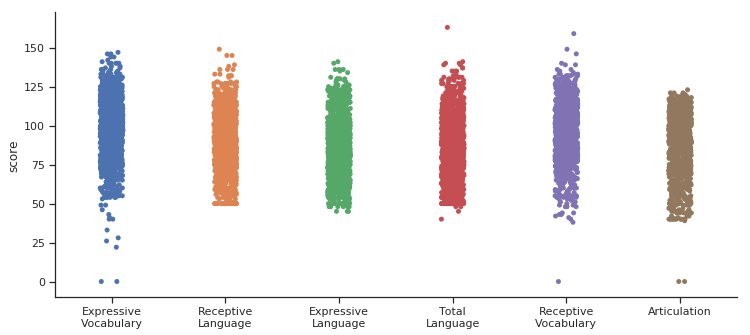

In [45]:
sns.catplot("domain_labels", y="score", data=test_scores)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

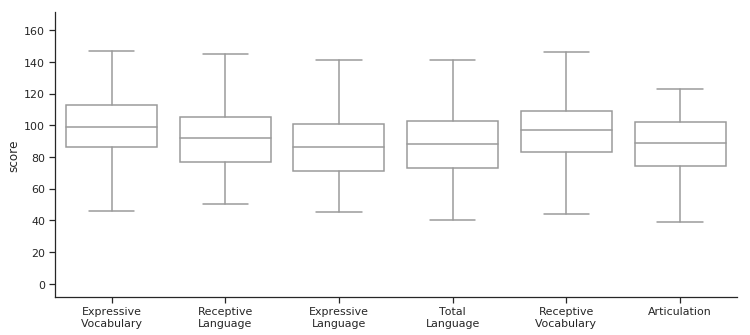

In [46]:
sns.catplot("domain_labels", y="score", data=test_scores, kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

## Domain-specific summaries

Age of amplification greater than 6mo.

In [47]:
(test_scores.assign(age_amp_greater_6=test_scores.age_amp>6)
         .groupby(['domain', 'age_amp_greater_6'])
         .score.describe())

count        mean        std   min  \
domain                age_amp_greater_6                                       
Articulation          False              512.0   91.417969  17.980450  40.0   
                      True               415.0   80.306024  20.580121   0.0   
Expressive Language   False              576.0   90.942708  18.589811  45.0   
                      True               607.0   82.069193  19.899960  45.0   
Expressive Vocabulary False              705.0  101.946099  18.199102  41.0   
                      True               570.0   93.471930  21.055957   0.0   
Language              False              591.0   92.710660  18.952730  45.0   
                      True               627.0   84.177033  21.051107  40.0   
Receptive Language    False              582.0   95.082474  17.413274  50.0   
                      True               605.0   86.874380  19.875375  50.0   
Receptive Vocabulary  False              709.0   99.471086  17.448417  38.0   
                      True               580.0   90.386207  18.869312   0.0   

                                           25%    50%     75%    max  
domain                age_amp_greater_6                               
Articulation          False              81.00   94.0  106.00  123.0  
                      True               67.00   83.0   97.00  118.0  
Expressive Language   False              77.00   92.0  104.00  141.0  
                      True               67.00   80.0   96.50  136.0  
Expressive Vocabulary False              90.00  103.0  116.00  146.0  
                      True               80.00   94.0  107.00  147.0  
Language              False              79.00   94.0  106.00  141.0  
                      True               69.00   83.0   98.00  163.0  
Receptive Language    False              85.00   96.0  107.00  145.0  
                      True               71.00   88.0  101.00  149.0  
Receptive Vocabulary  False              88.00  100.0  112.00  149.0  
                      True               78.75   91.0  103.25  159.0

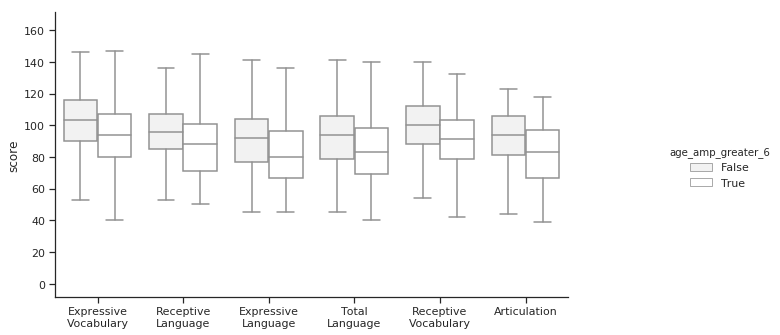

In [48]:
sns.catplot("domain_labels", y="score", hue='age_amp_greater_6', data=test_scores.assign(age_amp_greater_6=test_scores.age_amp>6),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

Age of enrollment greater than 6mo.

In [49]:
(test_scores.assign(age_enroll_greater_6=test_scores.age_int>6)
         .groupby(['domain', 'age_enroll_greater_6'])
         .score.describe())

count        mean        std  \
domain                age_enroll_greater_6                                 
Articulation          False                 512.0   89.833984  19.649019   
                      True                  415.0   82.260241  19.561367   
Expressive Language   False                 576.0   89.508681  19.403091   
                      True                  607.0   83.429984  19.674110   
Expressive Vocabulary False                 696.0  101.225575  19.908481   
                      True                  579.0   94.469775  19.428879   
Language              False                 591.0   91.294416  19.789347   
                      True                  627.0   85.511962  20.778409   
Receptive Language    False                 581.0   94.008606  18.401881   
                      True                  606.0   87.917492  19.385002   
Receptive Vocabulary  False                 703.0   97.987198  18.882938   
                      True                  586.0   92.259386  17.890387   

                                             min   25%    50%    75%    max  
domain                age_enroll_greater_6                                   
Articulation          False                  0.0  79.0   93.0  105.0  123.0  
                      True                  40.0  69.0   84.0   97.5  121.0  
Expressive Language   False                 45.0  75.0   91.0  104.0  141.0  
                      True                  45.0  69.0   83.0   98.0  136.0  
Expressive Vocabulary False                  0.0  89.0  103.0  116.0  146.0  
                      True                   0.0  82.0   96.0  107.0  147.0  
Language              False                 45.0  77.5   92.0  106.0  141.0  
                      True                  40.0  69.0   85.0  100.0  163.0  
Receptive Language    False                 50.0  83.0   94.0  107.0  145.0  
                      True                  50.0  73.0   88.5  101.0  149.0  
Receptive Vocabulary  False                  0.0  86.0   99.0  111.0  149.0  
                      True                  40.0  80.0   93.0  105.0  159.0

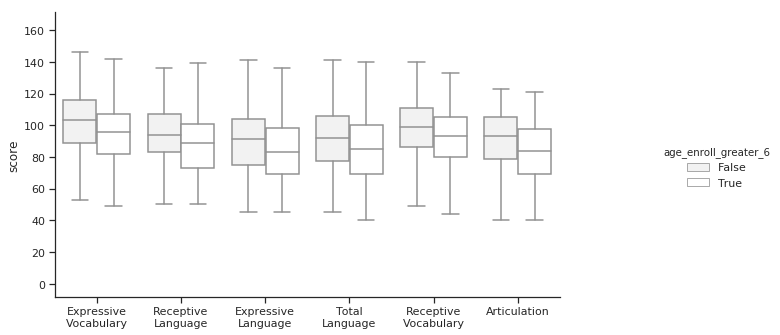

In [50]:
sns.catplot("domain_labels", y="score", hue='age_enroll_greater_6', data=test_scores.assign(age_enroll_greater_6=test_scores.age_int>6),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

(Non-)Profound hearing loss

In [56]:
(test_scores.assign(non_profound_hl=test_scores.deg_hl_below6)
         .groupby(['domain', 'non_profound_hl'])
         .score.describe())

count       mean        std   min  \
domain                non_profound_hl                                      
Articulation          0.0              380.0  82.931579  20.736583   0.0   
                      1.0              373.0  86.662198  18.767496  41.0   
Expressive Language   0.0              589.0  81.551783  19.493749  45.0   
                      1.0              545.0  91.297248  18.914759  45.0   
Expressive Vocabulary 0.0              552.0  93.862319  20.913248   0.0   
                      1.0              528.0  99.613636  18.193623   0.0   
Language              0.0              606.0  83.313531  20.273764  48.0   
                      1.0              563.0  93.349911  19.599008  40.0   
Receptive Language    0.0              589.0  86.444822  19.595113  50.0   
                      1.0              549.0  95.320583  17.663190  50.0   
Receptive Vocabulary  0.0              563.0  90.438721  18.630545   0.0   
                      1.0              529.0  96.879017  16.866244  44.0   

                                         25%    50%     75%    max  
domain                non_profound_hl                               
Articulation          0.0              68.75   86.0   98.25  121.0  
                      1.0              74.00   88.0  102.00  120.0  
Expressive Language   0.0              67.00   80.0   96.00  141.0  
                      1.0              77.00   92.0  105.00  136.0  
Expressive Vocabulary 0.0              80.00   95.5  108.00  146.0  
                      1.0              89.00  100.0  113.00  147.0  
Language              0.0              68.00   83.0   98.00  139.0  
                      1.0              80.00   94.0  108.00  163.0  
Receptive Language    0.0              71.00   88.0  101.00  145.0  
                      1.0              83.00   96.0  107.00  149.0  
Receptive Vocabulary  0.0              79.00   91.0  104.00  133.0  
                      1.0              86.00   98.0  109.00  159.0

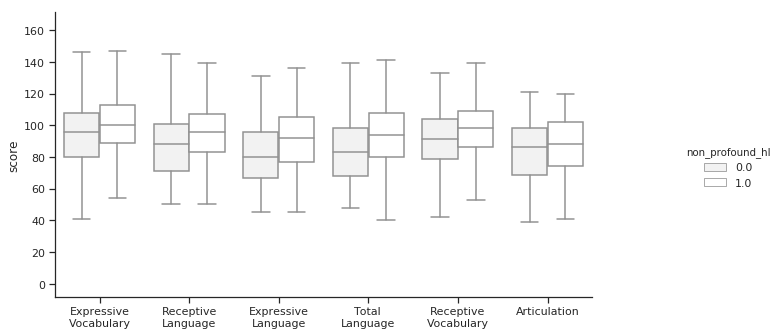

In [60]:
sns.catplot("domain_labels", y="score", hue='non_profound_hl', data=test_scores.assign(non_profound_hl=test_scores.deg_hl_below6),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

Mother with(out) college education

In [62]:
test_scores.groupby(['domain', 'mother_college']).score.describe()

count        mean        std   min  \
domain                mother_college                                       
Articulation          0.0             485.0   84.853608  19.612918   0.0   
                      1.0             130.0   87.723077  19.872468  40.0   
Expressive Language   0.0             710.0   84.794366  18.938173  45.0   
                      1.0             230.0   96.095652  20.233559  45.0   
Expressive Vocabulary 0.0             702.0   96.188034  19.850841   0.0   
                      1.0             226.0  103.938053  18.784051  49.0   
Language              0.0             735.0   86.576871  19.684342  48.0   
                      1.0             237.0   98.717300  20.354492  48.0   
Receptive Language    0.0             716.0   89.607542  18.420979  50.0   
                      1.0             229.0   99.593886  18.546673  50.0   
Receptive Vocabulary  0.0             708.0   93.281073  17.992182  38.0   
                      1.0             230.0  101.591304  17.526472  42.0   

                                        25%    50%     75%    max  
domain                mother_college                               
Articulation          0.0             72.00   86.0  101.00  121.0  
                      1.0             75.25   89.5  103.00  121.0  
Expressive Language   0.0             69.00   85.0   99.75  141.0  
                      1.0             81.00   98.0  111.00  140.0  
Expressive Vocabulary 0.0             83.00   97.0  110.00  146.0  
                      1.0             93.00  105.0  117.00  147.0  
Language              0.0             72.00   86.0  100.00  139.0  
                      1.0             83.00  100.0  114.00  163.0  
Receptive Language    0.0             75.00   90.0  103.00  138.0  
                      1.0             87.00  101.0  114.00  149.0  
Receptive Vocabulary  0.0             82.00   95.0  107.00  136.0  
                      1.0             91.00  103.0  113.00  159.0

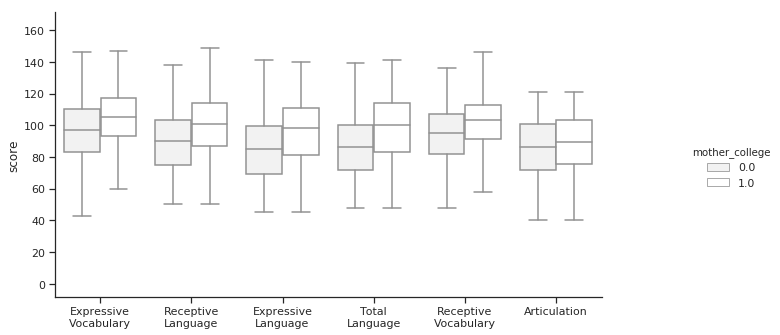

In [63]:
sns.catplot("domain_labels", y="score", hue='mother_college', data=test_scores,
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');